In [1]:
import pandas as pd 
import numpy as np
import os

In [2]:
runName = "run_01"

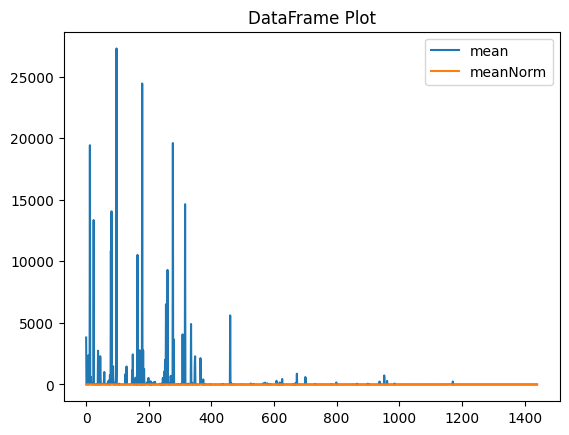

In [3]:
df = pd.read_csv("countTable_biom2.tsv",sep="\t")
df['mean'] = df.iloc[:, 1:].mean(axis=1)
df['min'] = df.iloc[:, 1:].min(axis=1)
df['max'] = df.iloc[:, 1:].max(axis=1)
df['median'] = df.iloc[:, 1:].median(axis=1)
df = df[["#KEY","mean"]]
df

df2 = pd.read_csv("countTable_biom1.tsv_Normalize_RelativeAbundance.tsv",sep="\t")
df2['meanNorm'] = df2.iloc[:, 1:].mean(axis=1)
df2 = df2[["#KEY","meanNorm"]]
df2

df3 = pd.merge(df,df2,on="#KEY")
df3
plot = df3.plot(title="DataFrame Plot")


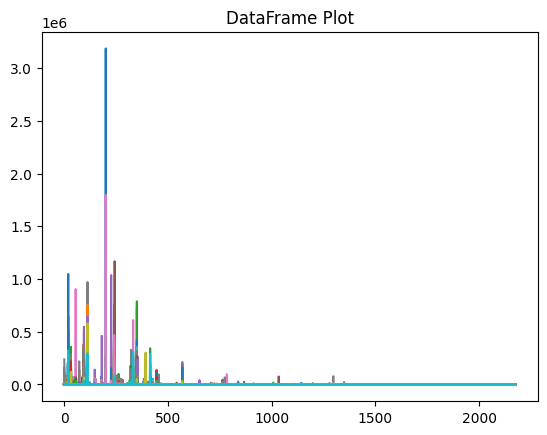

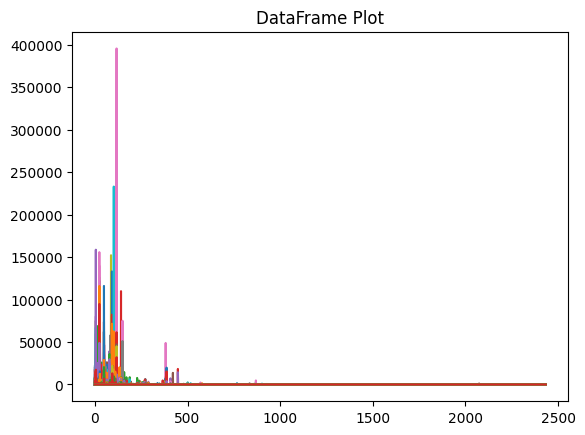

In [4]:
df = pd.read_csv("countTable_biom2.tsv",sep="\t")
plot = df.plot(title="DataFrame Plot",legend=False)
df2 = pd.read_csv("countTable_biom1.tsv",sep="\t")
plot2 = df2.plot(title="DataFrame Plot",legend=False)

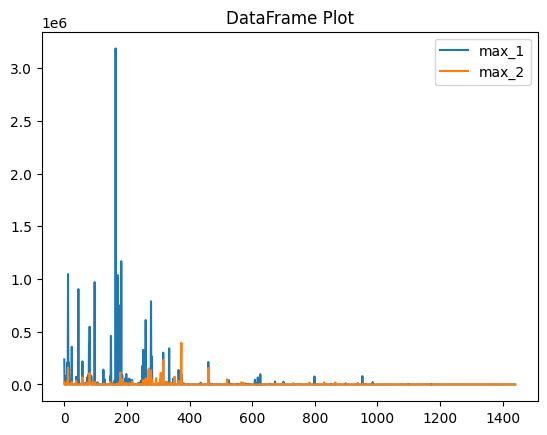

In [5]:
df = pd.read_csv("countTable_biom2.tsv",sep="\t")
df['max_1'] = df.iloc[:, 1:].max(axis=1)
df = df[["#KEY","max_1"]]
df

df2 = pd.read_csv("countTable_biom1.tsv",sep="\t")
df2['max_2'] = df2.iloc[:, 1:].max(axis=1)
df2 = df2[["#KEY","max_2"]]
df2

df3 = pd.merge(df,df2,on="#KEY")
df3
plot = df3.plot(title="DataFrame Plot")

In [6]:
def PlotComparrisonGraph(merge, norm, comparison):
    if(norm == "RA"):
        norm = "RelativeAbundance"
    elif(norm == "RLE"):
        norm = "RLE_Galaxy"
    elif(norm == "TMM"):
        norm = "TMM_Galaxy"
    if(merge == "count"):
        s = "countTable"
    else:
        s = f"mergedOn_{merge}"
    data = []
    for biom in ["biom1","biom2"]:
        filename = f"{s}_{biom}.tsv_Normalize_{norm}.tsv"
        print(os.path.exists(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}"))
        df = pd.read_csv(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}",sep="\t")
        if(comparison == "mean"):
            df[biom] = df.iloc[:, 1:].mean(axis=1)
        elif(comparison == "min"):
            df[biom] = df.iloc[:, 1:].min(axis=1)
        elif(comparison == "max"):
            df[biom] = df.iloc[:, 1:].max(axis=1)
        elif(comparison == "median"):
            df[biom] = df.iloc[:, 1:].median(axis=1)
        df = df[["#KEY",biom]]
        data.append(df)
    df_final = pd.merge(data[0],data[1],on="#KEY")
    plot = df_final.plot(title=f"Plot Cmparison of {comparison}",kind="line")
    # hehe huhu

In [7]:
PlotComparrisonGraph("count","RA","max")
PlotComparrisonGraph("count","RA","min")
PlotComparrisonGraph("count","RA","mean")
PlotComparrisonGraph("count","RA","median")

False


FileNotFoundError: [Errno 2] No such file or directory: '..\\outputs\\collection\\run_01\\normalized\\countTable_biom1.tsv_Normalize_RelativeAbundance.tsv'

True
True


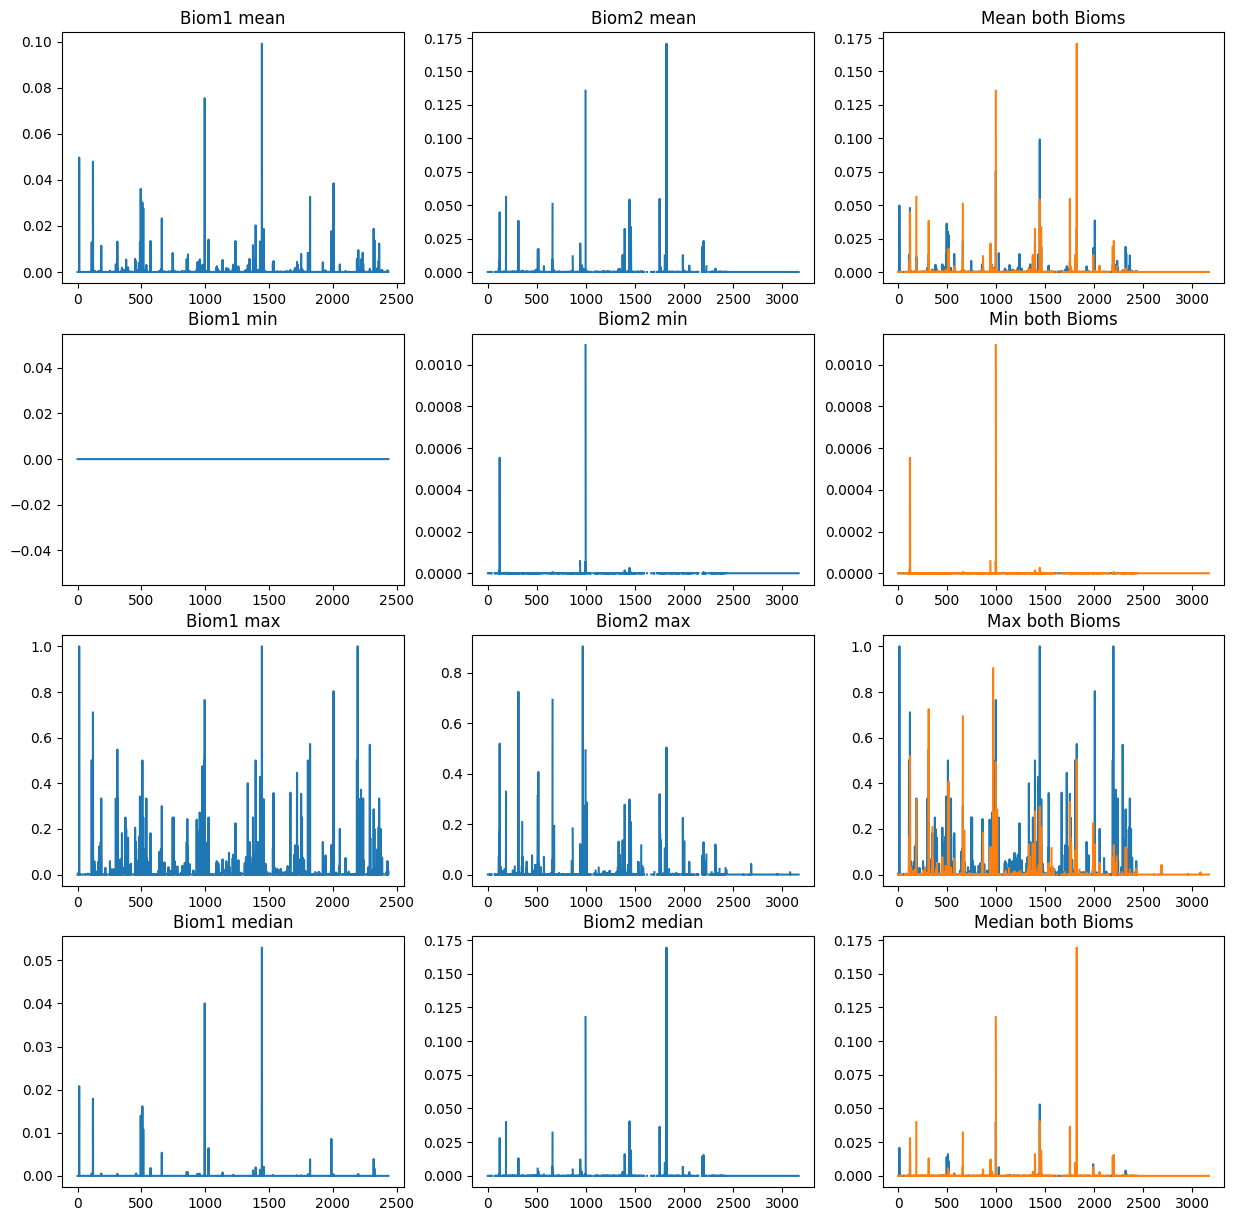

,#KEY,biom1_mean,biom1_min,biom1_max,biom1_median,biom2_mean,biom2_min,biom2_max,biom2_median
0,sk__Archaea,3.481013e-07,0.0,0.000095,0.0,2.210000e-06,0.0,0.000045,0.0
1,sk__Archaea;k__;p__Crenarchaeota,8.438819e-09,0.0,0.000002,0.0,3.200000e-08,0.0,0.000008,0.0
2,sk__Archaea;k__;p__Euryarchaeota;c__Methanobac...,2.194093e-07,0.0,0.000064,0.0,NaN,NaN,NaN,NaN
3,sk__Archaea;k__;p__Euryarchaeota;c__Methanobac...,1.078059e-06,0.0,0.000232,0.0,NaN,NaN,NaN,NaN
4,sk__Archaea;k__;p__Euryarchaeota;c__Methanobac...,1.729958e-07,0.0,0.000082,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3164,sk__Eukaryota;k__Viridiplantae;p__Streptophyta,NaN,NaN,NaN,NaN,8.000000e-09,0.0,0.000003,0.0
3165,sk__Eukaryota;k__Viridiplantae;p__Streptophyta...,NaN,NaN,NaN,NaN,0.000000e+00,0.0,0.000000,0.0
3166,sk__Eukaryota;k__Viridiplantae;p__Streptophyta...,NaN,NaN,NaN,NaN,2.220000e-07,0.0,0.000100,0.0
3167,sk__Mitochondria;k__;p__;c__;o__;f__;g__;s__Cu...,NaN,NaN,NaN,NaN,2.000000e-09,0.0,0.000001,0.0


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import math 
import os
# Get the angles from 0 to 2 pie (360 degree) in narray object 
runName = "run_01"
norm = "RA"
merge = "count"
figure, axis = plt.subplots(4, 3,figsize=(15, 15)) 
if(norm == "RA"):
    norm = "RelativeAbundance"
elif(norm == "RLE"):
    norm = "RLE_Galaxy"
elif(norm == "TMM"):
    norm = "TMM_Galaxy"
if(merge == "count"):
    s = "countTable"
else:
    s = f"mergedOn_{merge}"
data = []
for biom in ["biom1","biom2"]:
    filename = f"{s}_{biom}.tsv_Normalize_{norm}.tsv"
    print(os.path.exists(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}"))
    df = pd.read_csv(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}",sep="\t")
    df = df.sort_values(by=["#KEY"])
    df2 = pd.DataFrame()
    df2[f"#KEY"] = df["#KEY"]
    df2[f"{biom}_mean"] = df.iloc[:, 1:].mean(axis=1)
    df2[f"{biom}_min"] = df.iloc[:, 1:].min(axis=1)
    df2[f"{biom}_max"] = df.iloc[:, 1:].max(axis=1)
    df2[f"{biom}_median"] = df.iloc[:, 1:].median(axis=1)
    df2 = df2[["#KEY",f"{biom}_mean",f"{biom}_min",f"{biom}_max",f"{biom}_median"]]
    data.append(df2)
df_final = pd.merge(data[0],data[1],on="#KEY",how="outer")
#plot = df_final.plot(title=f"Plot Cmparison of ",kind="line")


#df_final = df_final.sort_values(by=['#KEY'],ascending=True)

X = np.arange(0, math.pi*2, 0.05) 

# Using built-in trigonometric function we can directly plot 
# the given cosine wave for the given angles 
Y1 = np.sin(X) 
Y2 = np.cos(X) 
Y3 = np.tan(X) 
Y4 = np.tanh(X) 
  
# Initialise the subplot function using number of rows and columns 

  
# Biom 1
axis[0, 0].plot(df_final["biom1_mean"]) 
axis[0, 0].set_title("Biom1 mean") 
  
# Biom 2
axis[0, 1].plot(df_final["biom2_mean"]) 
axis[0, 1].set_title("Biom2 mean") 
  
axis[0, 2].plot(df_final["biom1_mean"]) 
axis[0, 2].plot(df_final["biom2_mean"]) 
axis[0, 2].set_title("Mean both Bioms") 

# Biom 1
axis[1, 0].plot(df_final["biom1_min"]) 
axis[1, 0].set_title("Biom1 min") 
  
# Biom 2
axis[1, 1].plot(df_final["biom2_min"]) 
axis[1, 1].set_title("Biom2 min") 

axis[1, 2].plot(df_final["biom1_min"]) 
axis[1, 2].plot(df_final["biom2_min"]) 
axis[1, 2].set_title("Min both Bioms") 

# Biom 1
axis[2, 0].plot(df_final["biom1_max"]) 
axis[2, 0].set_title("Biom1 max") 
  
# Biom 2
axis[2, 1].plot(df_final["biom2_max"]) 
axis[2, 1].set_title("Biom2 max") 

axis[2, 2].plot(df_final["biom1_max"]) 
axis[2, 2].plot(df_final["biom2_max"]) 
axis[2, 2].set_title("Max both Bioms") 
# Biom 1
axis[3, 0].plot(df_final["biom1_median"]) 
axis[3, 0].set_title("Biom1 median") 
  
# Biom 2
axis[3, 1].plot(df_final["biom2_median"]) 
axis[3, 1].set_title("Biom2 median") 
  
axis[3, 2].plot(df_final["biom1_median"]) 
axis[3, 2].plot(df_final["biom2_median"]) 
axis[3, 2].set_title("Median both Bioms") 

# Combine all the operations and display 
plt.show() 
df_final

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


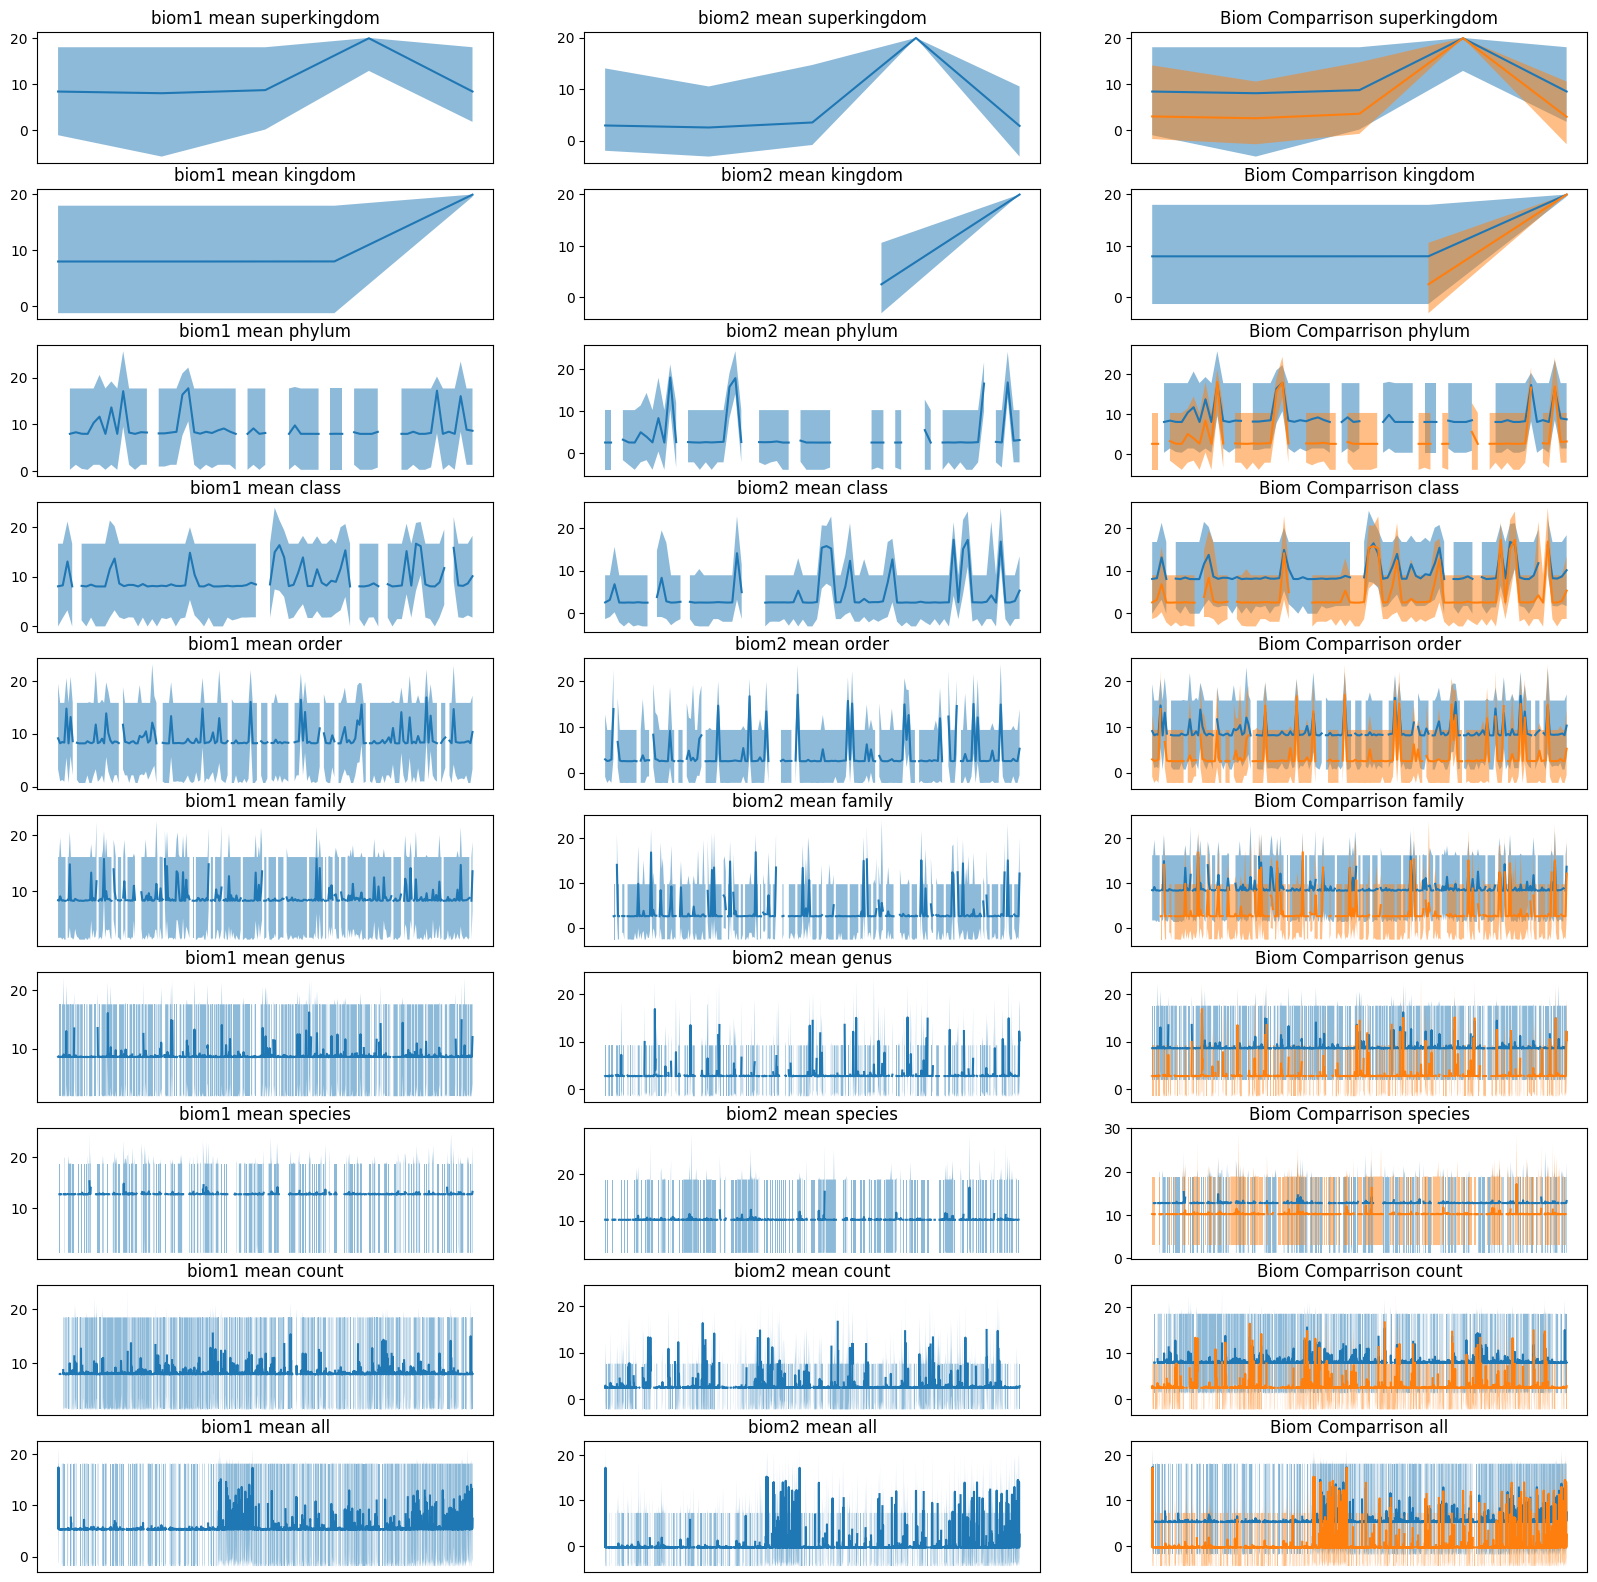

In [ ]:
# plot overlap
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import math 
import os
figure, axis = plt.subplots(10, 3,figsize=(20, 20)) 
["superkingdom","kingdom","phylum","class","order","family","genus","species","count","all"]
for row, merge in enumerate(["superkingdom","kingdom","phylum","class","order","family","genus","species","count","all"]):

    # Get the angles from 0 to 2 pie (360 degree) in narray object 
    runName = "run_01"
    norm = "TMM"
    #merge = "order"
    
    if(norm == "RA"):
        norm = "RelativeAbundance"
    elif(norm == "RLE"):
        norm = "RLE_Galaxy"
    elif(norm == "TMM"):
        norm = "TMM_Galaxy"
    if(merge == "count"):
        s = "countTable"
    else:
        s = f"mergedOn_{merge}"
    data = []
    for biom in ["biom1","biom2"]:
        filename = f"{s}_{biom}.tsv_Normalize_{norm}.tsv"
        print(os.path.exists(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}"))
        df = pd.read_csv(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}",sep="\t")

        #df = df.sort_values(by=["#KEY"])

        df2 = pd.DataFrame()
        
        df2[f"#KEY"] = df["#KEY"]
        df2[f"{biom}_mean"] = df.iloc[:, 1:].mean(axis=1)
        df2[f"{biom}_min"] = df.iloc[:, 1:].min(axis=1)
        df2[f"{biom}_max"] = df.iloc[:, 1:].max(axis=1)
        df2[f"{biom}_median"] = df.iloc[:, 1:].median(axis=1)
        df2 = df2[["#KEY",f"{biom}_mean",f"{biom}_min",f"{biom}_max",f"{biom}_median"]]
        data.append(df2)
    df_final = pd.merge(data[0],data[1],on="#KEY",how="outer")
    df_final["MeanSum"] = df_final["biom1_mean"] + df_final["biom2_mean"]
    #df_final = df_final.fillna(0)
    df_final = df_final.sort_values(by=["biom1_mean"],ascending=False).reset_index(drop=True)

    #plot = df_final.plot(title=f"Plot Cmparison of ",kind="line")
    
    #df_final = df_final.sort_values(by='#KEY')
    #X = np.arange(0, math.pi*2, 0.05) 

    
    # Biom 1
    c = 0
    #axis[0, 0].plot(df_final["biom1_mean"]) 
    for biom in ["biom1","biom2"]:
        if(biom == "biom1"):
            c = 0
        else:
            c = 1
        axis[row, c].fill_between(df_final["#KEY"],df_final[f"{biom}_max"], df_final[f"{biom}_min"], alpha=.5, linewidth=0)
        axis[row, c].plot(df_final[f"{biom}_mean"]) 
        axis[row, c].get_xaxis().set_visible(False)
        axis[row, c].set_title(f"{biom} mean {merge}") 

    for biom in ["biom1","biom2"]:
        c = 2
        axis[row, c].fill_between(df_final["#KEY"],df_final[f"{biom}_max"], df_final[f"{biom}_min"], alpha=.5, linewidth=0)
        axis[row, c].plot(df_final[f"{biom}_mean"]) 
        axis[row, c].get_xaxis().set_visible(False)
        axis[row, c].set_title(f"Biom Comparrison {merge}") 

#plt.savefig(f"comparrisonPlotFor{norm}")

In [ ]:
# plot overlap
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import math 
import os

for norm in ["CSS","RLE","TMM","Softmax"]:
    figure, axis = plt.subplots(10, 3,figsize=(20, 20)) 
    ["superkingdom","kingdom","phylum","class","order","family","genus","species","count","all"]
    for row, merge in enumerate(["superkingdom","kingdom","phylum","class","order","family","genus","species","count","all"]):

        # Get the angles from 0 to 2 pie (360 degree) in narray object 
        runName = "run_01"
        norm = "RLE"
        #merge = "order"
        
        if(norm == "RA"):
            norm = "RelativeAbundance"
        elif(norm == "RLE"):
            norm = "RLE_Galaxy"
        elif(norm == "TMM"):
            norm = "TMM_Galaxy"
        if(merge == "count"):
            s = "countTable"
        else:
            s = f"mergedOn_{merge}"
        data = []
        for biom in ["biom1","biom2"]:
            filename = f"{s}_{biom}.tsv_Normalize_{norm}.tsv"
            #print(os.path.exists(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}"))
            df = pd.read_csv(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}",sep="\t")
            df2 = pd.DataFrame()
            df2[f"#KEY"] = df["#KEY"]
            df2[f"{biom}_mean"] = df.iloc[:, 1:].mean(axis=1)
            df2[f"{biom}_min"] = df.iloc[:, 1:].min(axis=1)
            df2[f"{biom}_max"] = df.iloc[:, 1:].max(axis=1)
            df2[f"{biom}_median"] = df.iloc[:, 1:].median(axis=1)
            df2 = df2[["#KEY",f"{biom}_mean",f"{biom}_min",f"{biom}_max",f"{biom}_median"]]
            data.append(df2)
        df_final = pd.merge(data[0],data[1],on="#KEY",how="outer")
        #plot = df_final.plot(title=f"Plot Cmparison of ",kind="line")
        df_final = df_final.fillna(0)
        #df_final = df_final.sort_values(by='#KEY')
        #X = np.arange(0, math.pi*2, 0.05) 

        
        # Biom 1
        c = 0
        #axis[0, 0].plot(df_final["biom1_mean"]) 
        for biom in ["biom1","biom2"]:
            if(biom == "biom1"):
                c = 0
            else:
                c = 1
            axis[row, c].fill_between(df_final["#KEY"],df_final[f"{biom}_max"], df_final[f"{biom}_min"], alpha=.5, linewidth=0)
            axis[row, c].plot(df_final[f"{biom}_mean"]) 
            axis[row, c].get_xaxis().set_visible(False)
            axis[row, c].set_title(f"{biom} mean {merge}") 

        for biom in ["biom1","biom2"]:
            c = 2
            axis[row, c].fill_between(df_final["#KEY"],df_final[f"{biom}_max"], df_final[f"{biom}_min"], alpha=.5, linewidth=0)
            axis[row, c].plot(df_final[f"{biom}_mean"]) 
            axis[row, c].get_xaxis().set_visible(False)
            axis[row, c].set_title(f"Biom Comparrison {merge}") 
    print("test")
    plt.savefig(f"comparrisonPlotFor{norm}")
    plt.close()

test
test
test
test
